In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import utils as ut
import os
import m_models as mm
from tqdm import tqdm_notebook as tqdm

import pylab

import statsmodels.api as sm

import pickle

%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 40
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=40
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

In [3]:
backup_folder_root = "backup/"
if os.path.exists(backup_folder_root) == False:
    os.mkdir(backup_folder_root)
    
backup_folder = backup_folder_root + 'FullDatasetExperiment/'
if os.path.exists(backup_folder) == False:
    os.mkdir(backup_folder)

In [23]:
labels_for_plot = {
                    'cross': "$\mathsf{E}_{\mathfrak{D}_m}RS(m)$",
                    'apvc': "$\mathsf{E}_{\mathfrak{D}_m}\mathsf{D}[\hat{w}|\mathfrak{D}_m]$",
                    'acc': "$\mathsf{E}_{\mathfrak{D}_m}\mathsf{P}\{w \in A_{l}(\hat{w})\}$",
                    'alc': "$\mathsf{E}_{\mathfrak{D}_m}r_m$",
                    'maxu': "$\mathsf{E}_{\mathfrak{D}_m}\int_{w}u(\mathfrak{D}_m, w)p(w|\mathfrak{D}_m)dw$",
                    'kl': "$\mathsf{E}_{\mathfrak{D}_m}D_{KL}(p_1, p_2)$",
                    'bootstrap': "$\mathsf{E}_{\mathfrak{D}_m}$",
                    }

# Boston

In [46]:
name = 'boston'
X, y = ut.DataLoader(name = name)
X, y = ut.preprocess(X, y)

print(X.shape)

methods = {
            'lagrange': lambda X, y: mm.lagrange(X, y),
            'ratio': lambda X, y: mm.likelihood_ratio(X, y),
            'wald': lambda X, y: mm.wald(X, y),
            'cross': lambda X, y: mm.cross_val(X, y, k_for_meaning=1000, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'apvc': lambda X, y: mm.APVC(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'acc': lambda X, y: mm.ACC(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'alc': lambda X, y: mm.ALC(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'maxu': lambda X, y: mm.MAX_U(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'kl': lambda X, y: mm.KL_method(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'bootstrap': lambda X, y: mm.bootstrap(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
#             'logistic': lambda X, y: mm.LogisticRegressionMethod(X, y),
          }

# answers = {}
# for key in methods.keys():
#     print('Calculating ' + key)
#     answers[key] = methods[key](X, y)

# pickle.dump(answers, open(backup_folder + name+'.p', "wb"))
answers = pickle.load(open(backup_folder + name+'.p', "rb"))

print('--------------------')
for key in answers.keys():
    print( ('%-10s%s%d')%(key, ' = ', answers[key]['m*']))

(506, 12)
Calculating kl


--------------------
lagrange   = 246
ration     = 155
wald       = 246
cross      = 330
apvc       = 94
acc        = 505
alc        = 505
maxu       = 484
kl         = 114
bootstrap  = 494


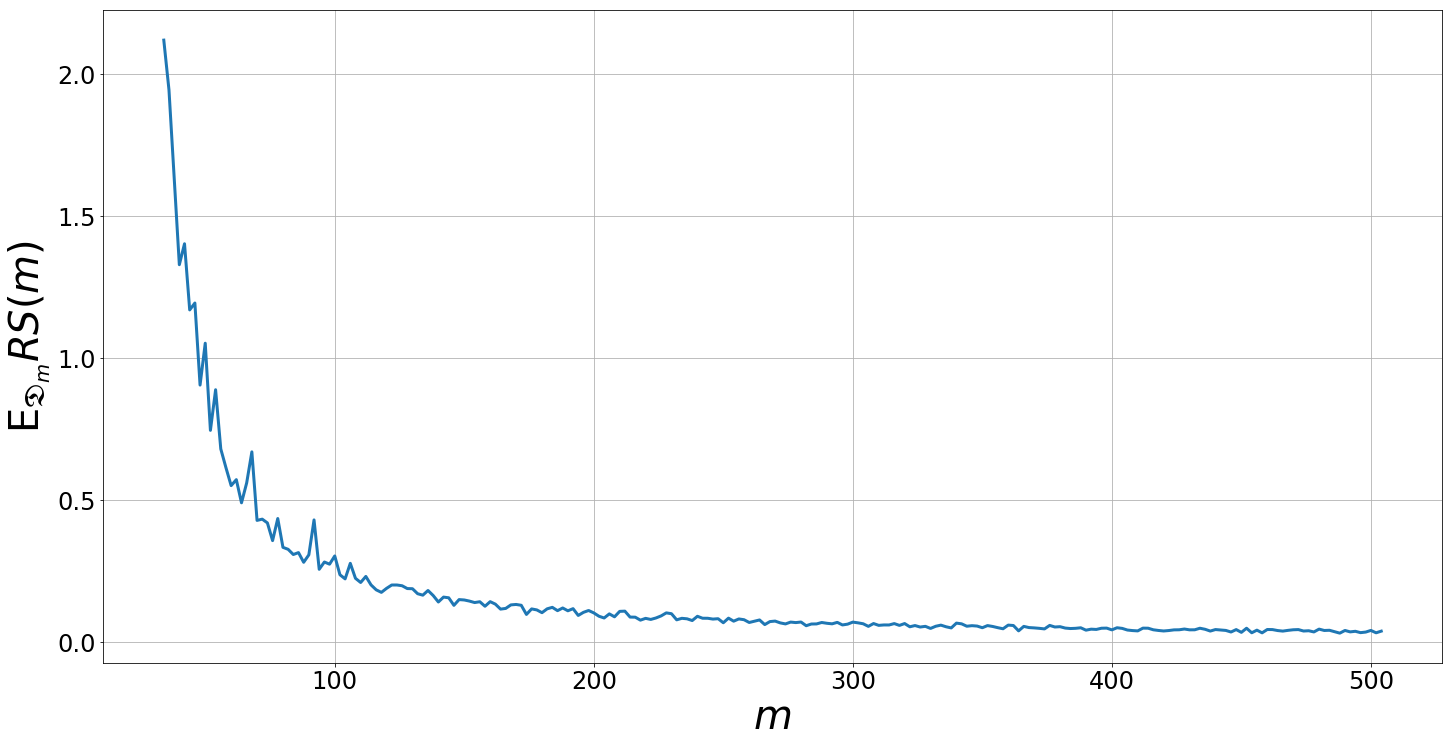

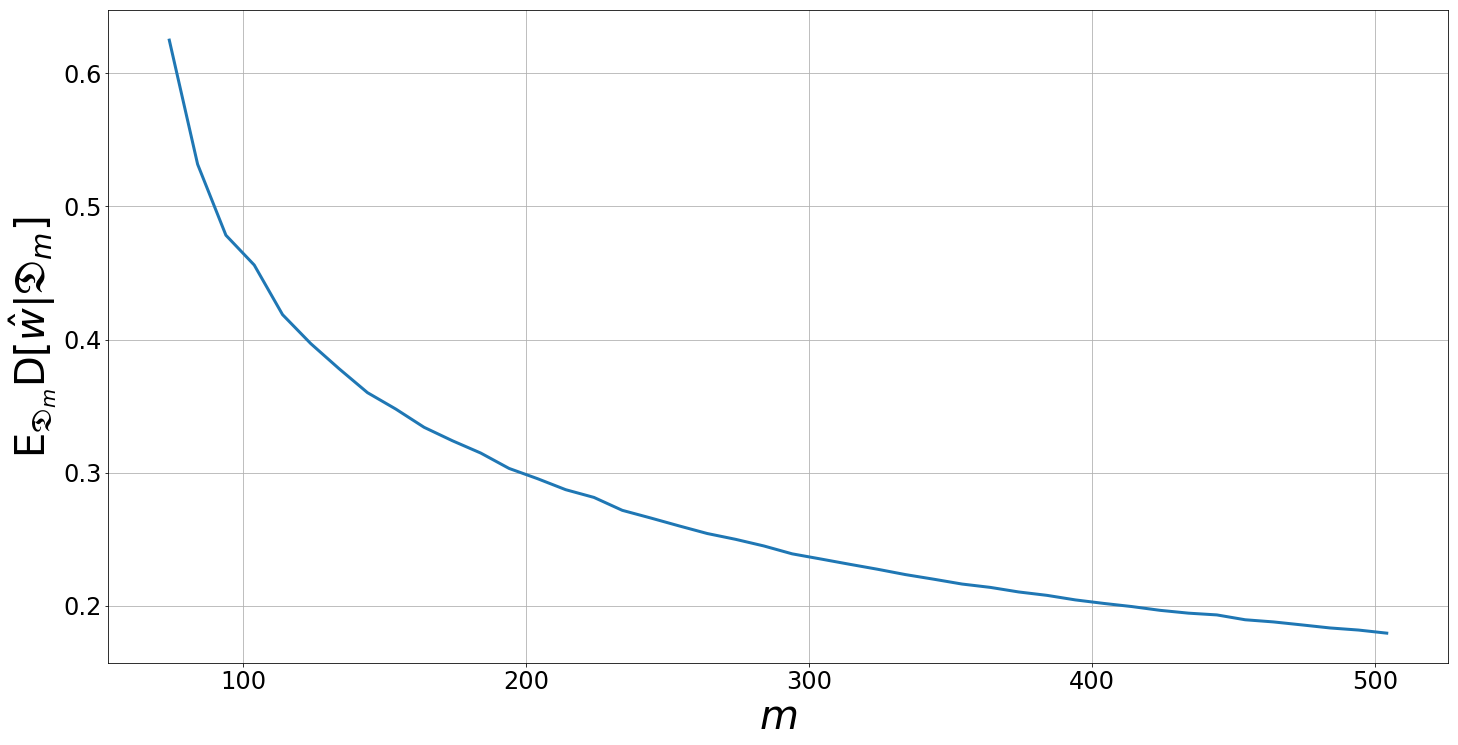

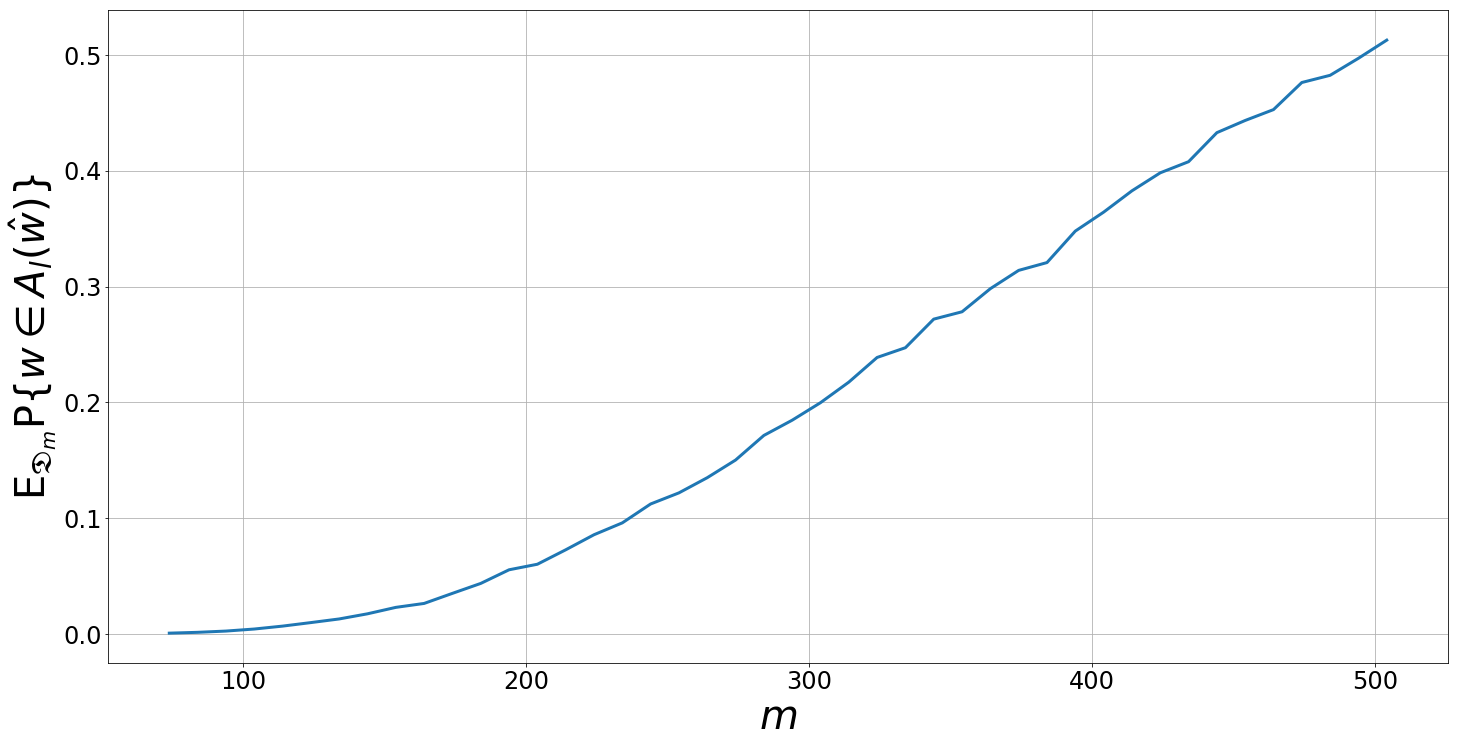

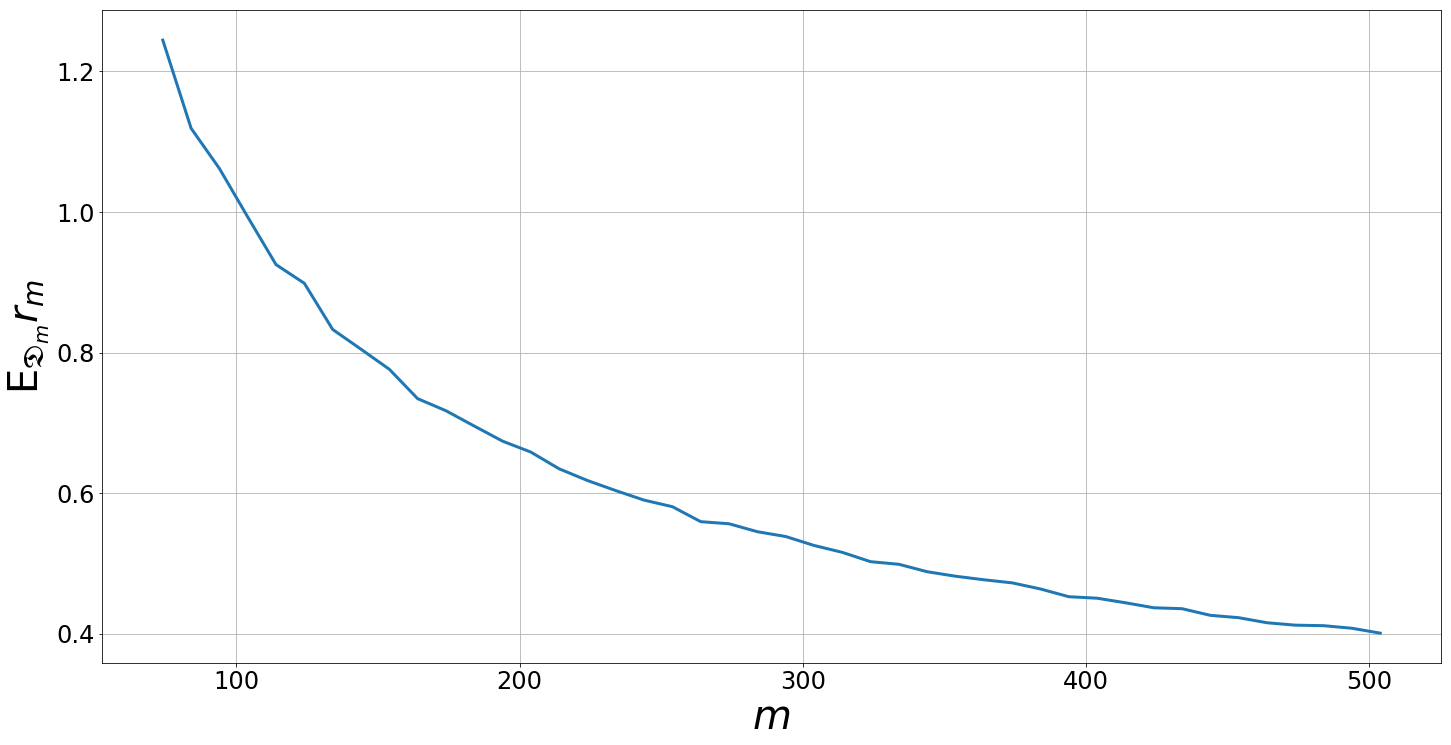

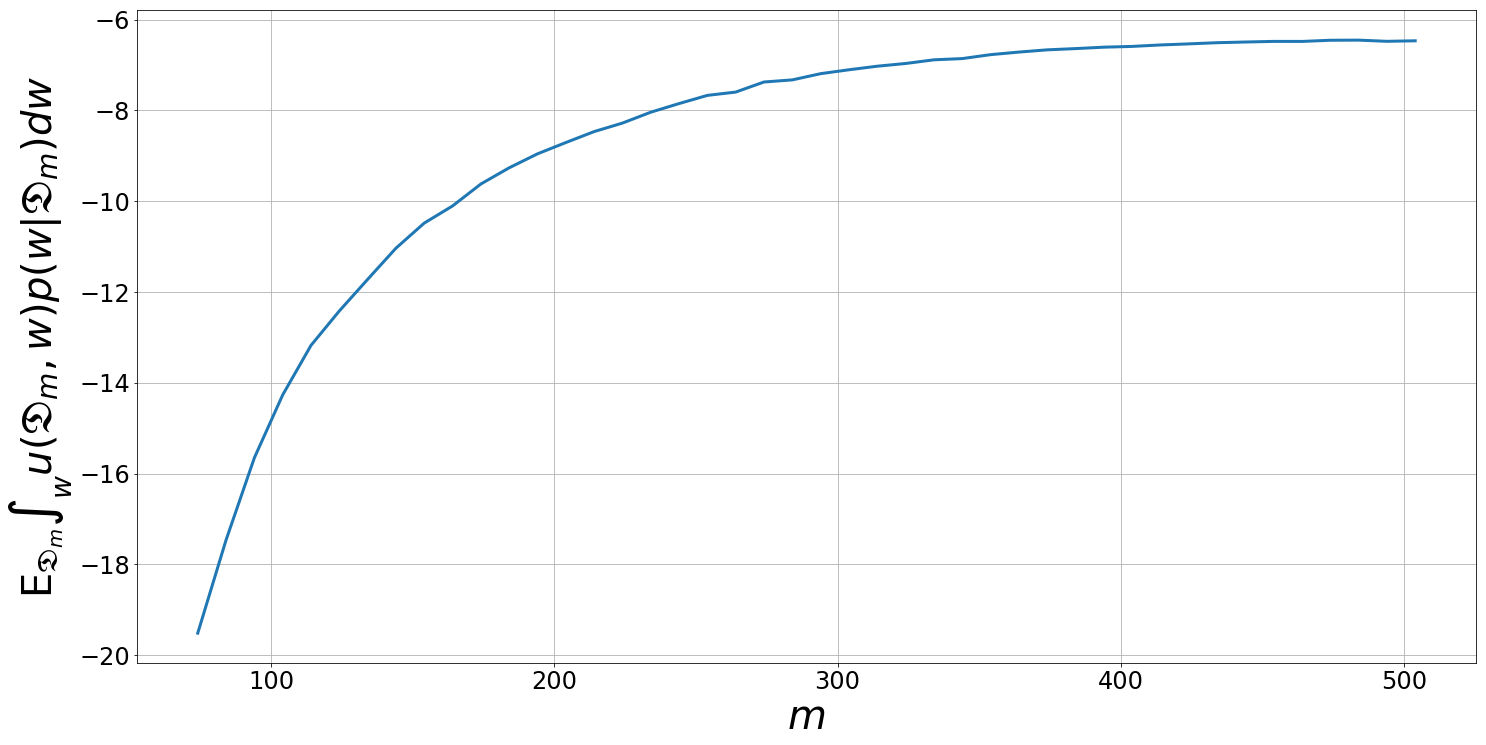

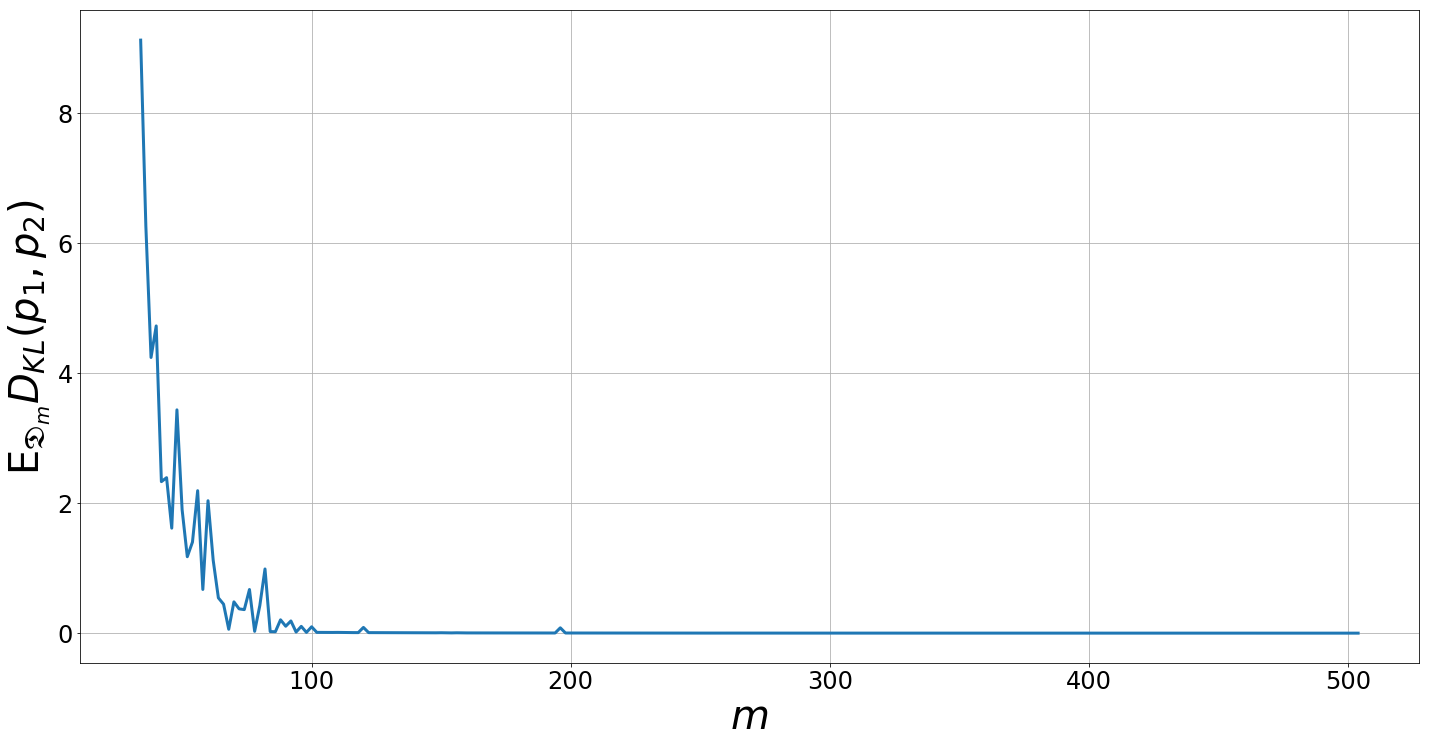

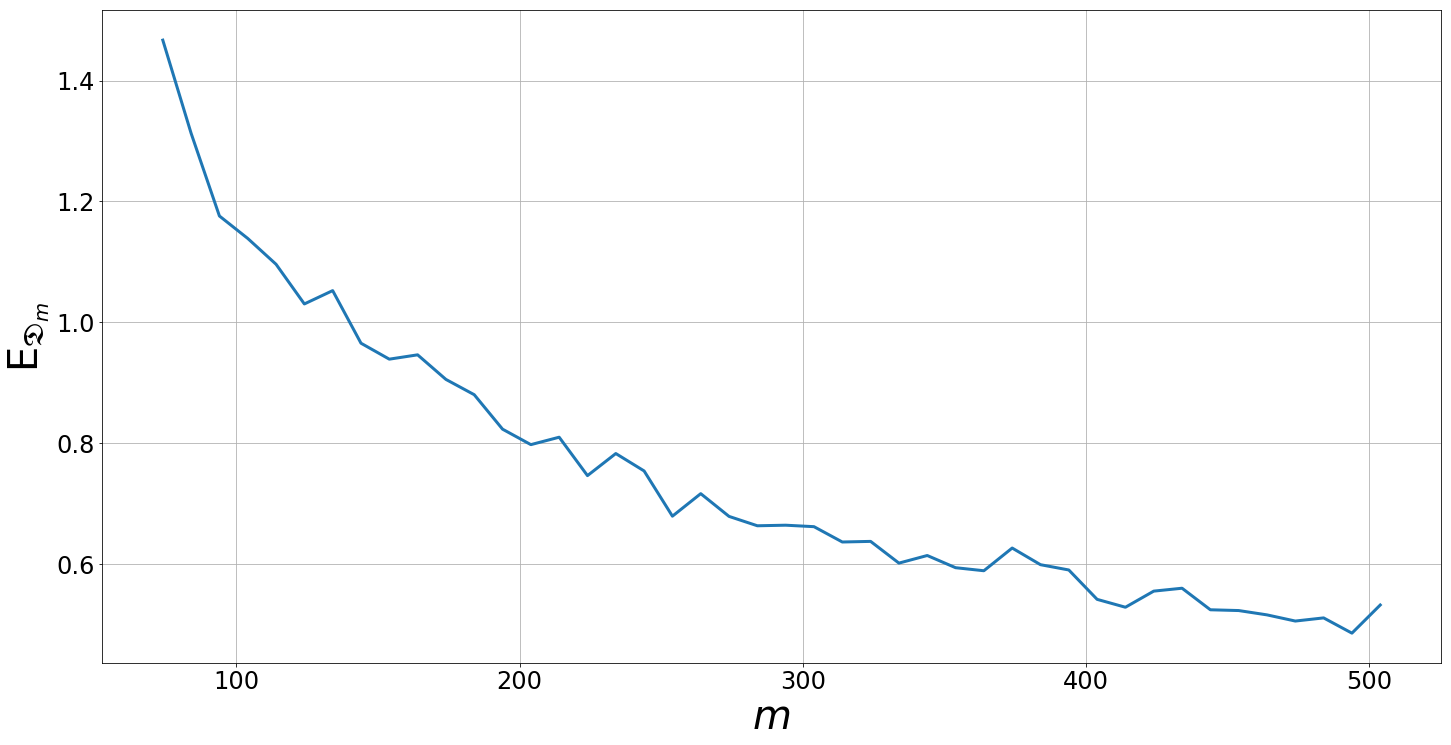

In [47]:
r = 5
for key in labels_for_plot.keys():
    plt.plot(answers[key]['m'][r:], answers[key]['E'][r:])

    plt.xlabel("$m$")
    plt.ylabel(labels_for_plot[key])
    plt.grid()
    plt.savefig('graphic/FullDataset/' + key + '.pdf')
    plt.show()

# Servo

In [6]:
name = 'servo'
X, y = ut.DataLoader(name = name)
X, y = ut.preprocess(X, y)

print(X.shape)

methods = {
            'lagrange': lambda X, y: mm.lagrange(X, y),
            'ratio': lambda X, y: mm.likelihood_ratio(X, y),
            'wald': lambda X, y: mm.wald(X, y),
            'cross': lambda X, y: mm.cross_val(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'apvc': lambda X, y: mm.APVC(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'acc': lambda X, y: mm.ACC(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'alc': lambda X, y: mm.ALC(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'maxu': lambda X, y: mm.MAX_U(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'kl': lambda X, y: mm.KL_method(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
            'bootstrap': lambda X, y: mm.bootstrap(X, y, num = 2, progress_bar=lambda x: tqdm(x, leave = False)),
#             'logistic': lambda X, y: mm.LogisticRegressionMethod(X, y),
          }

# answers = {}
# for key in methods.keys():
#     print('Calculating ' + key)
#     answers[key] = methods[key](X, y)

# pickle.dump(answers, open(backup_folder + name+'.p', "wb"))
answers = pickle.load(open(backup_folder + name+'.p', "rb"))

print('--------------------')
for key in answers.keys():
    print( ('%-10s%s%d')%(key, ' = ', answers[key]['m*']))

(167, 5)
--------------------
lagrange   = 279
ratio      = 23
wald       = 279
cross      = 82
apvc       = 32
acc        = 166
alc        = 166
maxu       = 162
kl         = 38
bootstrap  = 166


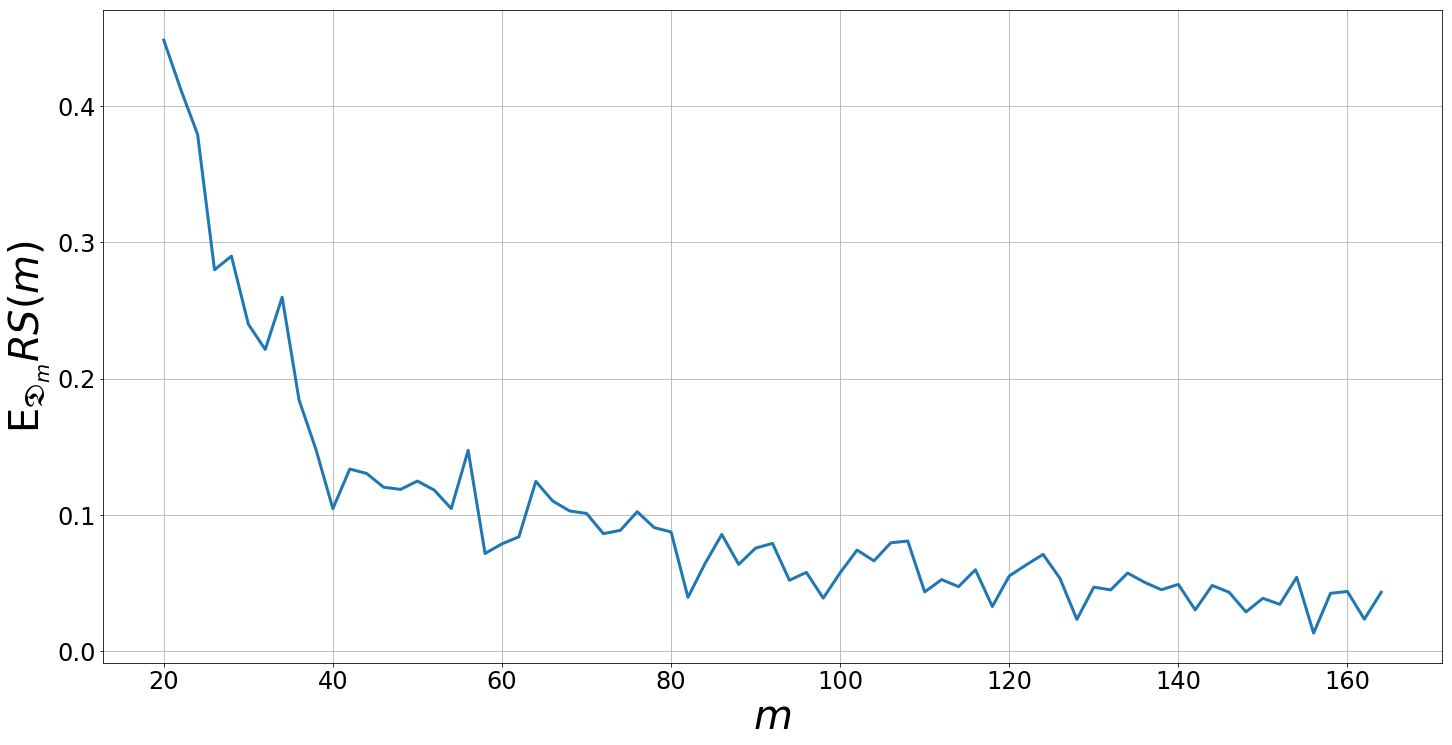

In [7]:
r = 5
plt.plot(answers['cross']['m'][r:], answers['cross']['E'][r:])

plt.xlabel("$m$")
plt.ylabel("$\mathsf{E}_{\mathfrak{D}_m}RS(m)$")
plt.grid()

# plt.savefig('graphic/FullDataset/Servo/cross_val.pdf')

# NBA

In [8]:
name = 'nba'
X, y = ut.DataLoader(name = name)
X, y = ut.preprocess(X, y)

print(X.shape)

methods = {
            'lagrange': lambda X, y: mm.lagrange(X, y),
            'ratio': lambda X, y: mm.likelihood_ratio(X, y),
            'wald': lambda X, y: mm.wald(X, y),
            'cross': lambda X, y: mm.cross_val(X, y, num = 30, progress_bar=lambda x: tqdm(x, leave = False)),
            'apvc': lambda X, y: mm.APVC(X, y, num = 30, progress_bar=lambda x: tqdm(x, leave = False)),
            'acc': lambda X, y: mm.ACC(X, y, num = 30, progress_bar=lambda x: tqdm(x, leave = False)),
            'alc': lambda X, y: mm.ALC(X, y, num = 30, progress_bar=lambda x: tqdm(x, leave = False)),
            'maxu': lambda X, y: mm.MAX_U(X, y, num = 30, progress_bar=lambda x: tqdm(x, leave = False)),
            'kl': lambda X, y: mm.KL_method(X, y, num = 30, progress_bar=lambda x: tqdm(x, leave = False)),
            'bootstrap': lambda X, y: mm.bootstrap(X, y, num = 30, progress_bar=lambda x: tqdm(x, leave = False)),
            'logistic': lambda X, y: mm.LogisticRegressionMethod(X, y),
          }

# answers = {}
# for key in methods.keys():
#     print('Calculating ' + key)
#     answers[key] = methods[key](X, y)

# pickle.dump(answers, open(backup_folder + name+'.p', "wb"))
answers = pickle.load(open(backup_folder + name+'.p', "rb"))

print('--------------------')
for key in answers.keys():
    print( ('%-10s%s%d')%(key, ' = ', answers[key]['m*']))

(1329, 2)
--------------------
lagrange   = 1862
ratio      = 994
wald       = 1808
cross      = 64
apvc       = 64
acc        = 514
alc        = 514
maxu       = 94
kl         = 34
bootstrap  = 394
logistic   = 145


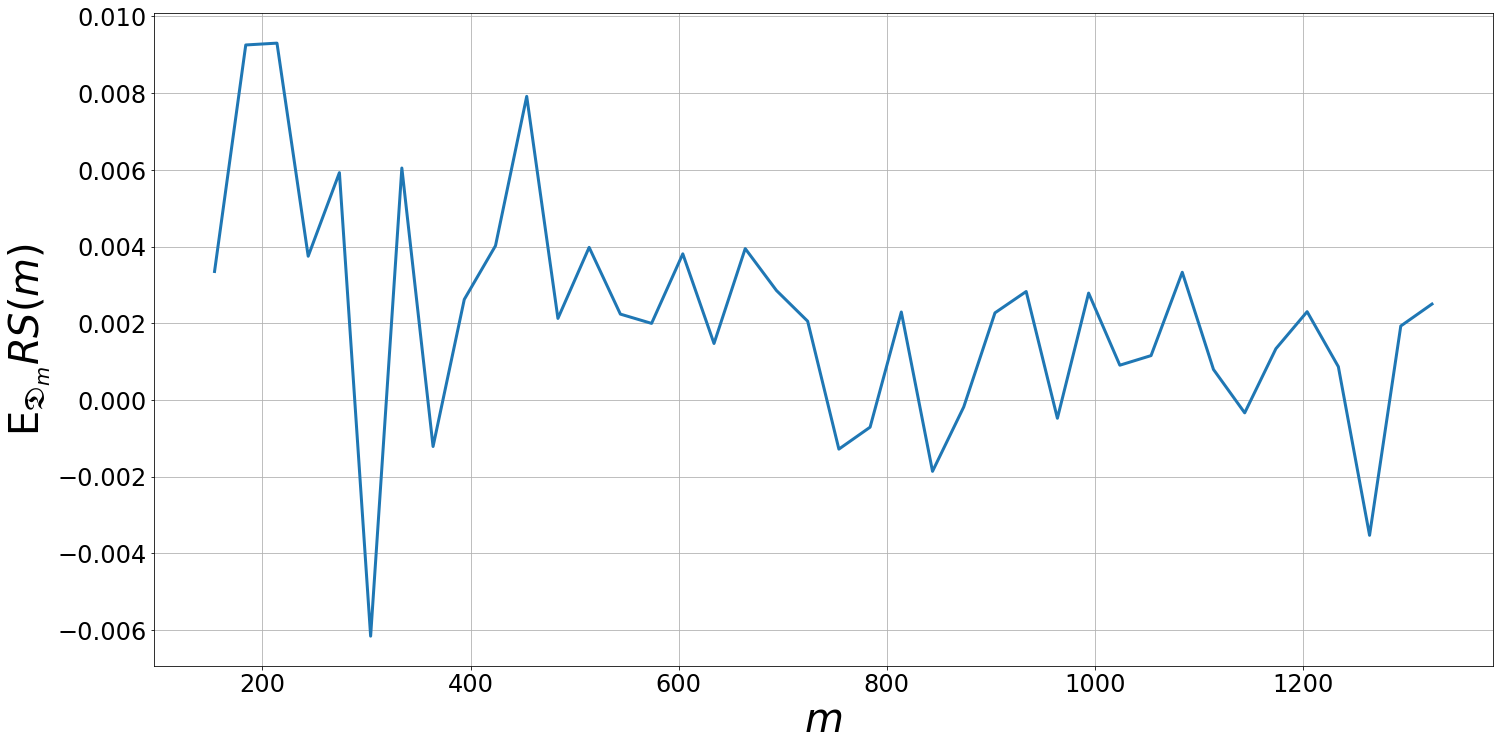

In [9]:
r = 5
plt.plot(answers['cross']['m'][r:], answers['cross']['E'][r:])

plt.xlabel("$m$")
plt.ylabel("$\mathsf{E}_{\mathfrak{D}_m}RS(m)$")
plt.grid()

# plt.savefig('graphic/FullDataset/NBA/cross_val.pdf')

# Synthetic 1

In [10]:
name = 'synthetic1'
X, y = ut.DataLoader(name = name)
X, y = ut.preprocess(X, y)

print(X.shape)

methods = {
            'lagrange': lambda X, y: mm.lagrange(X, y),
            'ratio': lambda X, y: mm.likelihood_ratio(X, y),
            'wald': lambda X, y: mm.wald(X, y),
            'cross': lambda X, y: mm.cross_val(X, y, num = 10, end = 500, progress_bar=lambda x: tqdm(x, leave = False)),
            'apvc': lambda X, y: mm.APVC(X, y, num = 10, end = 500, progress_bar=lambda x: tqdm(x, leave = False)),
            'acc': lambda X, y: mm.ACC(X, y, num = 10, end = 500, progress_bar=lambda x: tqdm(x, leave = False)),
            'alc': lambda X, y: mm.ALC(X, y, num = 10, end = 500, progress_bar=lambda x: tqdm(x, leave = False)),
            'maxu': lambda X, y: mm.MAX_U(X, y, num = 10, end = 500, progress_bar=lambda x: tqdm(x, leave = False)),
            'kl': lambda X, y: mm.KL_method(X, y, num = 10, end = 500, progress_bar=lambda x: tqdm(x, leave = False)),
            'bootstrap': lambda X, y: mm.bootstrap(X, y, num = 10, end = 500, progress_bar=lambda x: tqdm(x, leave = False)),
#             'logistic': lambda X, y: mm.LogisticRegressionMethod(X, y),
          }

# answers = {}
# for key in methods.keys():
#     print('Calculating ' + key)
#     answers[key] = methods[key](X, y)

# pickle.dump(answers, open(backup_folder + name+'.p', "wb"))
answers = pickle.load(open(backup_folder + name+'.p', "rb"))

print('--------------------')
for key in answers.keys():
    print( ('%-10s%s%d')%(key, ' = ', answers[key]['m*']))

(50000, 5)
--------------------
lagrange   = 278
ratio      = 278
wald       = 278
cross      = 80
apvc       = 20
acc        = 190
alc        = 190
maxu       = 150
kl         = 40
bootstrap  = 70


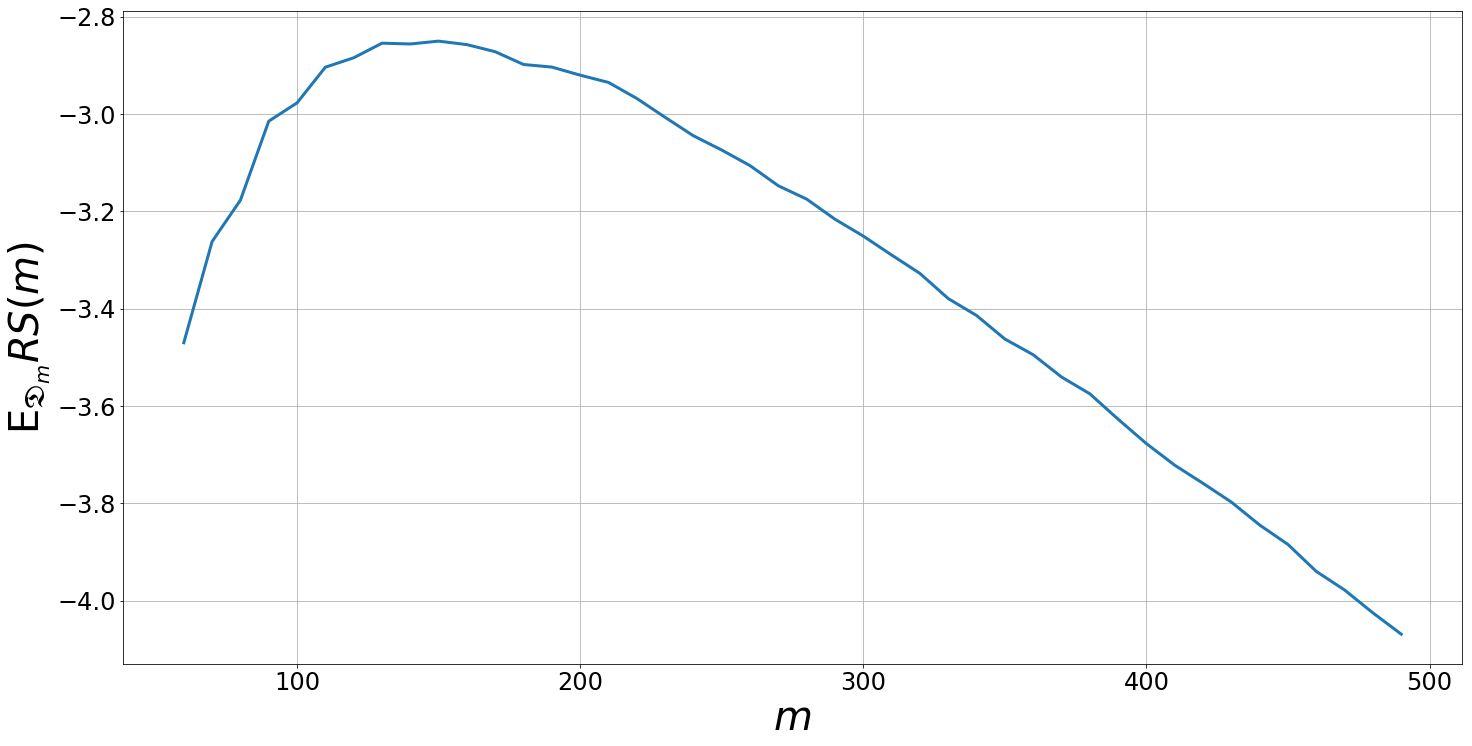

In [11]:
r = 5
plt.plot(answers['apvc']['m'][r:], answers['maxu']['E'][r:])

plt.xlabel("$m$")
plt.ylabel("$\mathsf{E}_{\mathfrak{D}_m}RS(m)$")
plt.grid()

# plt.savefig('graphic/FullDataset/Synthehic1/cross_val.pdf')

# Synthetic 2

In [12]:
name = 'synthetic2'
X, y = ut.DataLoader(name = name)
X, y = ut.preprocess(X, y)

print(X.shape)

methods = {
            'lagrange': lambda X, y: mm.lagrange(X, y),
            'ratio': lambda X, y: mm.likelihood_ratio(X, y),
            'wald': lambda X, y: mm.wald(X, y),
            'cross': lambda X, y: mm.cross_val(X, y, num = 40, end = 2000, progress_bar=lambda x: tqdm(x, leave = False)),
            'apvc': lambda X, y: mm.APVC(X, y, num = 40, end = 2000, progress_bar=lambda x: tqdm(x, leave = False)),
            'acc': lambda X, y: mm.ACC(X, y, num = 40, end = 2000, progress_bar=lambda x: tqdm(x, leave = False)),
            'alc': lambda X, y: mm.ALC(X, y, num = 40, end = 2000, progress_bar=lambda x: tqdm(x, leave = False)),
            'maxu': lambda X, y: mm.MAX_U(X, y, num = 40, end = 2000, progress_bar=lambda x: tqdm(x, leave = False)),
            'kl': lambda X, y: mm.KL_method(X, y, num = 40, end = 2000, progress_bar=lambda x: tqdm(x, leave = False)),
            'bootstrap': lambda X, y: mm.bootstrap(X, y, num = 40, end = 2000, progress_bar=lambda x: tqdm(x, leave = False)),
            'logistic': lambda X, y: mm.LogisticRegressionMethod(X, y),
          }

# answers = {}
# for key in methods.keys():
#     print('Calculating ' + key)
#     answers[key] = methods[key](X, y)

# pickle.dump(answers, open(backup_folder + name+'.p', "wb"))
answers = pickle.load(open(backup_folder + name+'.p', "rb"))

print('--------------------')
for key in answers.keys():
    print( ('%-10s%s%d')%(key, ' = ', answers[key]['m*']))

(50000, 4)
--------------------
lagrange   = 2125
ratio      = 2238
wald       = 2166
cross      = 88
apvc       = 128
acc        = 1728
alc        = 1728
maxu       = 208
kl         = 88
bootstrap  = 1048
logistic   = 2892


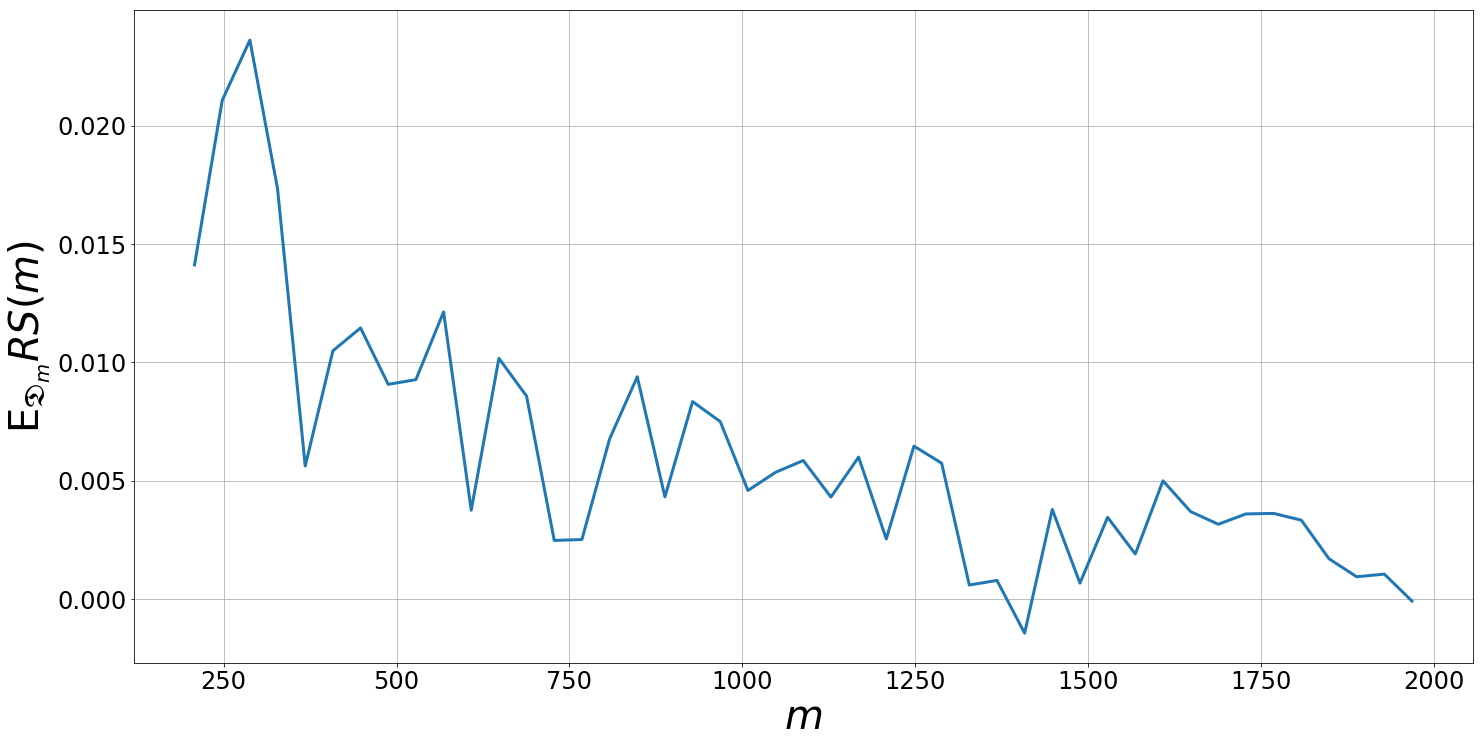

In [13]:
r = 5
plt.plot(answers['cross']['m'][r:], answers['cross']['E'][r:])

plt.xlabel("$m$")
plt.ylabel("$\mathsf{E}_{\mathfrak{D}_m}RS(m)$")
plt.grid()

# plt.savefig('graphic/FullDataset/Synthehic2/cross_val.pdf')

# Abalone

In [14]:
name = 'abalone'
X, y = ut.DataLoader(name = name)
X, y = ut.preprocess(X, y)

print(X.shape)

methods = {
            'lagrange': lambda X, y: mm.lagrange(X, y),
            'ratio': lambda X, y: mm.likelihood_ratio(X, y),
            'wald': lambda X, y: mm.wald(X, y),
            'cross': lambda X, y: mm.cross_val(X, y, num = 40, progress_bar=lambda x: tqdm(x, leave = False)),
            'apvc': lambda X, y: mm.APVC(X, y, num = 40, progress_bar=lambda x: tqdm(x, leave = False)),
            'acc': lambda X, y: mm.ACC(X, y, num = 40, progress_bar=lambda x: tqdm(x, leave = False)),
            'alc': lambda X, y: mm.ALC(X, y, num = 40, progress_bar=lambda x: tqdm(x, leave = False)),
            'maxu': lambda X, y: mm.MAX_U(X, y, num = 40, progress_bar=lambda x: tqdm(x, leave = False)),
            'kl': lambda X, y: mm.KL_method(X, y, num = 40, progress_bar=lambda x: tqdm(x, leave = False)),
            'bootstrap': lambda X, y: mm.bootstrap(X, y, num = 40, progress_bar=lambda x: tqdm(x, leave = False)),
            'logistic': lambda X, y: mm.LogisticRegressionMethod(X, y),
          }

# answers = {}
# for key in methods.keys():
#     print('Calculating ' + key)
#     answers[key] = methods[key](X, y)

# pickle.dump(answers, open(backup_folder + name+'.p', "wb"))
answers = pickle.load(open(backup_folder + name+'.p', "rb"))

print('--------------------')
for key in answers.keys():
    print( ('%-10s%s%d')%(key, ' = ', answers[key]['m*']))

(2870, 5)
--------------------
lagrange   = 2583
ratio      = 211
wald       = 2375
cross      = 210
apvc       = 1850
acc        = 2869
alc        = 2869
maxu       = 410
kl         = 250
bootstrap  = 2869
logistic   = 104


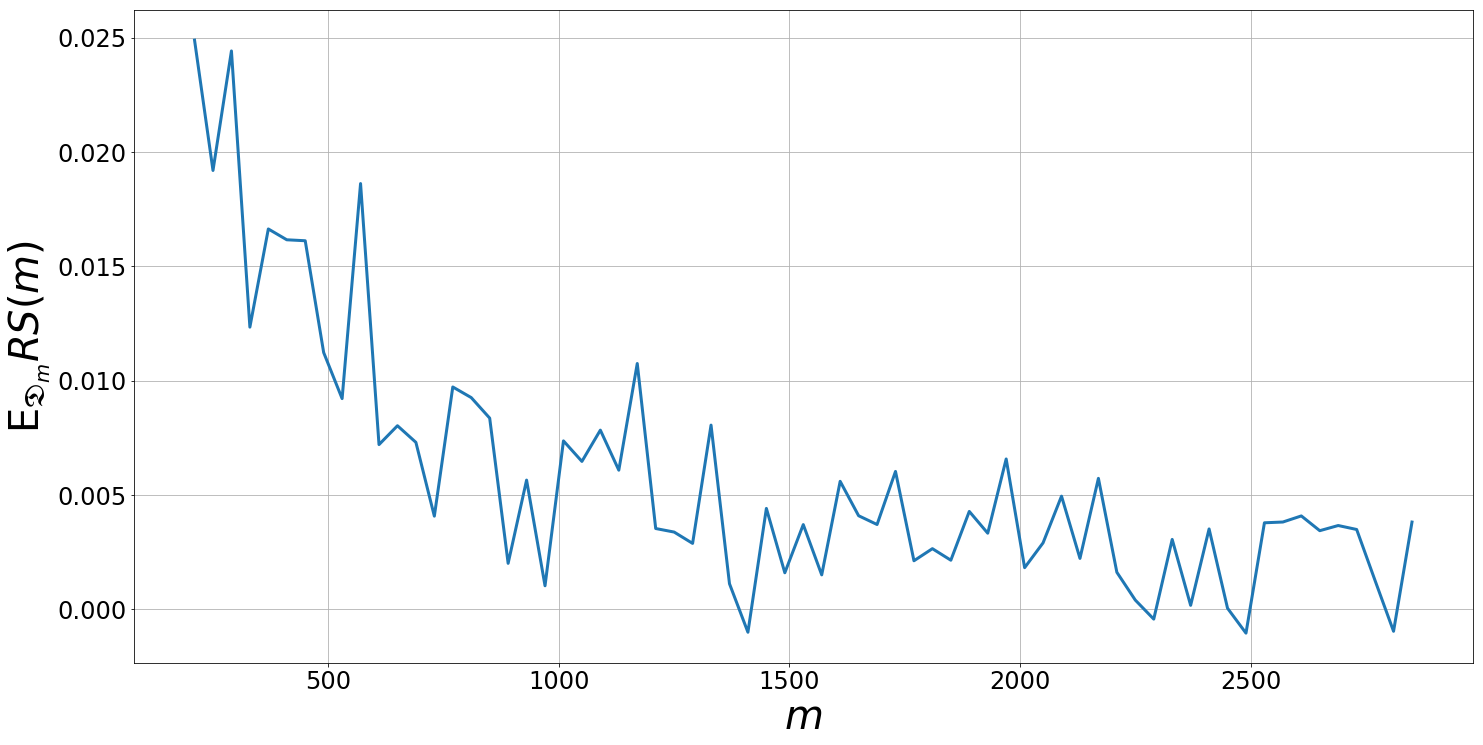

In [15]:
r = 5
plt.plot(answers['cross']['m'][r:], answers['cross']['E'][r:])

plt.xlabel("$m$")
plt.ylabel("$\mathsf{E}_{\mathfrak{D}_m}RS(m)$")
plt.grid()

# plt.savefig('graphic/FullDataset/Abalone/cross_val.pdf')